<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [11]:
import pandas as pd

Load the dataset into a dataframe.


In [14]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [19]:
!pip install seaborn
import seaborn as sns

/var/folders/nc/xc5z28nj27s9_k9c75pkv8bc0000gn/T/ipykernel_43737/2654243281.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df['ConvertedComp'], shade=True)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


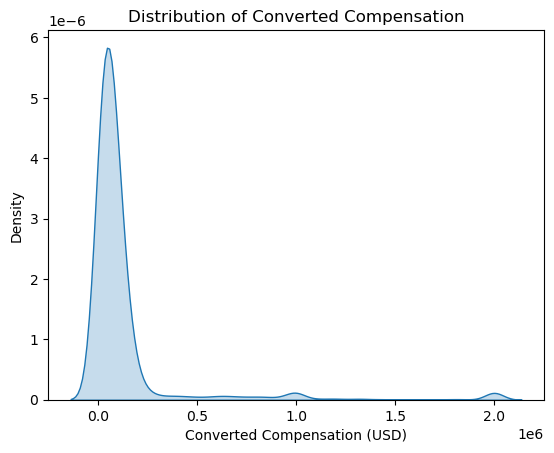

In [21]:
# your code goes here
import matplotlib.pyplot as plt

# Plot the distribution curve (KDE plot)
sns.kdeplot(data=df['ConvertedComp'], shade=True)

# Set the title and labels
plt.title('Distribution of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Density')

# Show the plot
plt.show()

Plot the histogram for the column `ConvertedComp`.


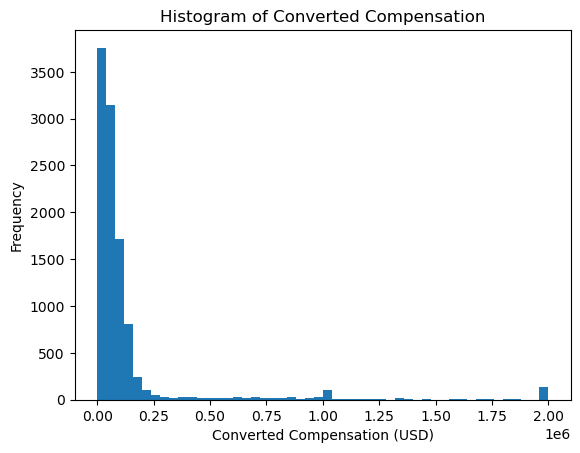

In [23]:
# your code goes here
# Plot the histogram
plt.hist(df['ConvertedComp'], bins=50)

# Set the title and labels
plt.title('Histogram of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

What is the median of the column `ConvertedComp`?


In [25]:
# your code goes here
df['ConvertedComp'].mean()

131596.7316197316

How many responders identified themselves only as a **Man**?


In [27]:
# your code goes here
num_men = df[df['Gender'] == 'Man'].shape[0]
print("Number of responders who identified as 'Man':", num_men)

Number of responders who identified as 'Man': 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [29]:
# your code goes here
women_df = df[df['Gender'] == 'Woman']
# Calculate the median ConvertedComp for women
median_convertedcomp_women = women_df['ConvertedComp'].median()
print("Median ConvertedComp for women:", median_convertedcomp_women)

Median ConvertedComp for women: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [32]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

In [36]:
df['Age'].median()

29.0

Plot a histogram of the column `Age`.


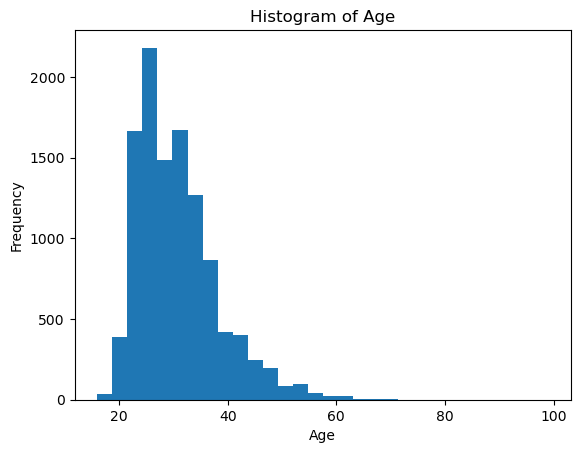

In [38]:
# your code goes here
plt.hist(df['Age'], bins=30)

# Set the title and labels
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


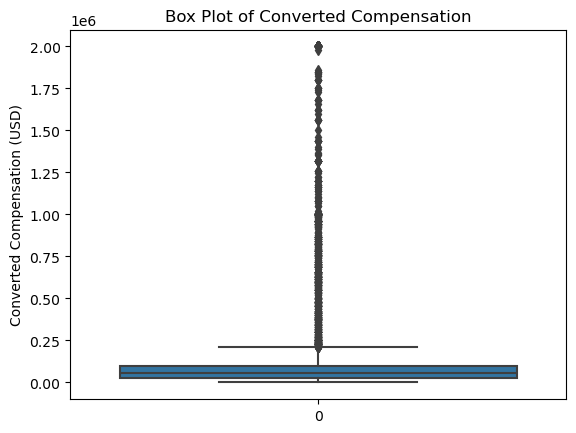

In [40]:
# your code goes here
sns.boxplot(data=df['ConvertedComp'])

# Set the title and labels
plt.title('Box Plot of Converted Compensation')
plt.ylabel('Converted Compensation (USD)')

# Show the plot
plt.show()

In [56]:
df['ConvertedComp'].median()

57745.0

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [42]:
# your code goes here
# Calculate the 25th and 75th percentiles
q1 = df['ConvertedComp'].quantile(0.25)
q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the IQR
iqr = q3 - q1

print("Interquartile Range (IQR) for ConvertedComp:", iqr)

Interquartile Range (IQR) for ConvertedComp: 73132.0


Find out the upper and lower bounds.


In [44]:
# your code goes here
# Calculate the 25th and 75th percentiles
q1 = df['ConvertedComp'].quantile(0.25)
q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the IQR
iqr = q3 - q1

# Calculate the lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

Lower bound: -82830.0
Upper bound: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [46]:
# your code goes here
# Calculate the 25th and 75th percentiles
q1 = df['ConvertedComp'].quantile(0.25)
q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the IQR
iqr = q3 - q1

# Calculate the lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Count the number of outliers
num_outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)].shape[0]

print("Number of outliers in ConvertedComp:", num_outliers)

Number of outliers in ConvertedComp: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [50]:
# your code goes here
# Calculate the 25th and 75th percentiles
q1 = df['ConvertedComp'].quantile(0.25)
q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the IQR
iqr = q3 - q1

# Calculate the lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter the DataFrame to remove outliers
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

print("Original DataFrame shape:", df.shape)
print("DataFrame without outliers shape:", df_no_outliers.shape)

Original DataFrame shape: (11398, 85)
DataFrame without outliers shape: (9703, 85)


In [58]:
df_no_outliers['ConvertedComp'].median()

52704.0

In [60]:
df_no_outliers['ConvertedComp'].mean()

59883.20838915799

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [54]:
# your code goes here
numerical_columns = df.select_dtypes(include=['number'])

# Calculate the correlation between Age and all other numerical columns
correlation_with_age = numerical_columns.corr()['Age']

print(correlation_with_age)

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
